<a href="https://colab.research.google.com/github/travislatchman/Cardiac-Ultrasound-Image-Segmentation-and-Stroke-Volume-estimation/blob/main/Cardiac_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import Reconstruction as Rec
import Segmentation as Seg
import pyvista as pv
import numpy as np
import re

def getVolumesForPatient(patient):
    types = ['2CH_ED', '2CH_ES', '4CH_ED', '4CH_ES']
    contours = []
    aspectRatio = 0
    for t in types: 
        image, aspect = Seg.read_patient_mhd_file(patient, t)
        b, region = Seg.segmentImage(image[0], aspect, t, False, False)
        contours.append(region.astype(np.uint8))
        if aspect != aspectRatio and aspectRatio > 0:
            raise Exception('Different Aspects')
        aspectRatio = aspect
        
    resampled = Rec.resampleAllContours(contours)

    ED = Rec.generatePointCloud(resampled[0], resampled[2], 4, aspectRatio, False)
    ES = Rec.generatePointCloud(resampled[1], resampled[3], 4, aspectRatio, False)
    
    EDsurface = pv.wrap(np.array(ED)).reconstruct_surface()
    ESsurface = pv.wrap(np.array(ES)).reconstruct_surface()

    
    fileInfo = Seg.read_patient_info_file(patient)
    parts = re.split(': |\n', fileInfo)
    iED = parts.index("LVedv")
    iES = parts.index("LVesv")
    
    return EDsurface.volume, ESsurface.volume, float(parts[iED+1]), float(parts[iES+1])

20
40
60
80
100
120
140
160
180
200
220
240


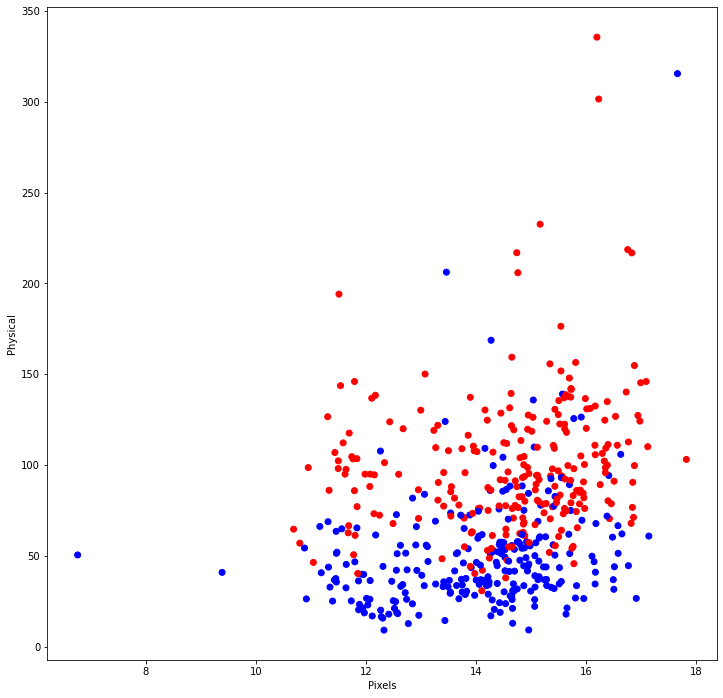

In [12]:
import matplotlib.pyplot as plt

pixels = []
physical = []
color = []
for patientNumber in range(1, 251):
    if patientNumber % 20 == 0:
        print(patientNumber)
    pixelED, pixelES, physicalED, physicalES = getVolumesForPatient(patientNumber)
    
    pixels.append(pixelED)
    physical.append(physicalED)
    color.append('red')
    
    pixels.append(pixelES)
    physical.append(physicalES)
    color.append('blue')
    
plt.figure(figsize=(12,12))
plt.xlabel('Pixels')
plt.ylabel('Physical')
plt.scatter(np.log(np.array(pixels)), physical, c=color)
plt.show()


**Testing to make sure that volume is actual volume and not bounding box volume**


In [7]:
import pyvista as pv

sphere = pv.Sphere(radius=1)
surface = sphere.reconstruct_surface()

print(surface.volume)
#True volume would be 4.18
#Bounding box would be 8

4.096869300268425
